# Intro to map data with Geopandas

#### Load python tools

In [24]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [25]:
#!pip install geopandas

In [26]:
import pandas as pd
import geopandas as gpd

In [27]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

---

## Import geography

#### Read states GeoJSON file

In [28]:
states_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/states.geojson"
)

#### What's that look like? 

In [33]:
states_gdf.head()

,state_fips,state_name,geometry
0,01,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,02,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,04,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,05,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,06,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


#### Quick plot

<AxesSubplot:>

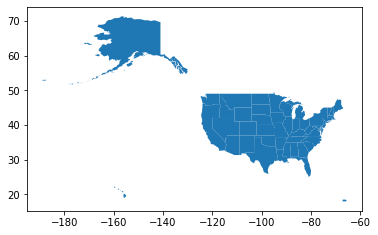

In [32]:
states_gdf.plot()

#### Exclude features: Alaska and Hawaii

In [34]:
exclude = ["Alaska", "Hawaii", "Puerto Rico"]

#### Focus on the mainland states

In [40]:
mainland_gdf = states_gdf[~states_gdf["state_name"].isin(exclude)]

#### Plot it

<AxesSubplot:>

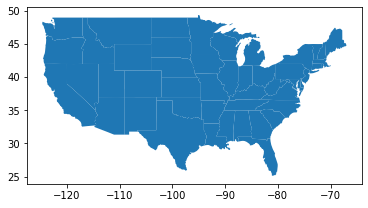

In [41]:
mainland_gdf.plot()

#### Filter just west coast

In [42]:
west_coast_states = ["California", "Oregon", "Washington"]

In [43]:
west_coast_gdf = states_gdf[states_gdf["state_name"].isin(west_coast_states)]

#### Plot it

<AxesSubplot:>

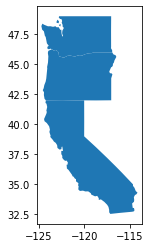

In [44]:
west_coast_gdf.plot()

---

## Import values data

#### Mexican-American population by state

In [45]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/usc/main/data/processed/mexican_pop_states.csv",
    dtype={"geoid": str},
)

#### First five rows

In [46]:
df.head()

,geoid,name,all_pop,hisp_pop,mexican_pop,hisp_pct_pop,mex_pct_all_pop,mex_pct_hisp_pop
0,01,Alabama,4876250,208626,126071,4.28,2.59,60.43
1,02,Alaska,737068,51870,28205,7.04,3.83,54.38
2,04,Arizona,7050299,2208663,1957968,31.33,27.77,88.65
3,05,Arkansas,2999370,224130,161614,7.47,5.39,72.11
4,06,California,39283497,15327688,12687312,39.02,32.30,82.77


#### Which state's population has the highest share of Mexican-American residents? 

In [48]:
df[df["mex_pct_all_pop"] == df["mex_pct_all_pop"].max()]

,geoid,name,all_pop,hisp_pop,mexican_pop,hisp_pct_pop,mex_pct_all_pop,mex_pct_hisp_pop
43,48,Texas,28260856,11116881,9502159,39.34,33.62,85.48


#### Which state's population has the lowest share of Hispanic residents? 

In [52]:
df[df["hisp_pct_pop"] == df["hisp_pct_pop"].min()]

,geoid,name,all_pop,hisp_pop,mexican_pop,hisp_pct_pop,mex_pct_all_pop,mex_pct_hisp_pop
48,54,West Virginia,1817305,28368,11009,1.56,0.61,38.81


---

## Merge

In [53]:
mex_am_gdf = pd.merge(mainland_gdf, df, left_on="state_fips", right_on="geoid")

#### Did it work? 

<AxesSubplot:>

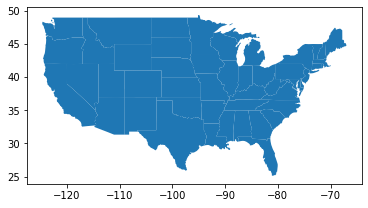

In [56]:
mex_am_gdf.plot()

#### First five rows? 

In [57]:
mex_am_gdf.head()

,state_fips,state_name,geometry,geoid,name,all_pop,hisp_pop,mexican_pop,hisp_pct_pop,mex_pct_all_pop,mex_pct_hisp_pop
0,01,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",01,Alabama,4876250,208626,126071,4.28,2.59,60.43
1,04,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",04,Arizona,7050299,2208663,1957968,31.33,27.77,88.65
2,05,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",05,Arkansas,2999370,224130,161614,7.47,5.39,72.11
3,06,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",06,California,39283497,15327688,12687312,39.02,32.30,82.77
4,08,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",08,Colorado,5610349,1208172,885441,21.53,15.78,73.29


---

## Export

#### Save our geodataframe as GeoJSON

In [60]:
mex_am_gdf.to_file(
    "../data/processed/mexican_americans_states.geojson", driver="GeoJSON"
)